Generating 16x9 images for use in slideshows.

In [ ]:
import pandas as pd
from nltk import word_tokenize
import pronouncing
import sys
from PIL import Image, ImageDraw, ImageFont, ImageEnhance, ImageOps
import PillowPatch
from nltk.corpus import wordnet as wn
import re
import random
import math

In [ ]:
def get_illustration():
    import glob
    imgpaths = glob.glob("../data/illustration_images/*")
    import random
    while True:
        path = random.choice(imgpaths)
        im = Image.open(path)
        if ((im.size[0]/im.size[1]) > 0.6) and ((im.size[0]/im.size[1]) < 1.2) and (im.size[0]*im.size[1]) > 14000:
            break
    return im

def create_img_mask(img):
    imgb = ImageEnhance.Brightness(img)
    imgc = ImageEnhance.Contrast(imgc)
    imgmask = ImageOps.invert(imgc.enhance(3).convert('L'))
    return imgmask

(1200, 900)


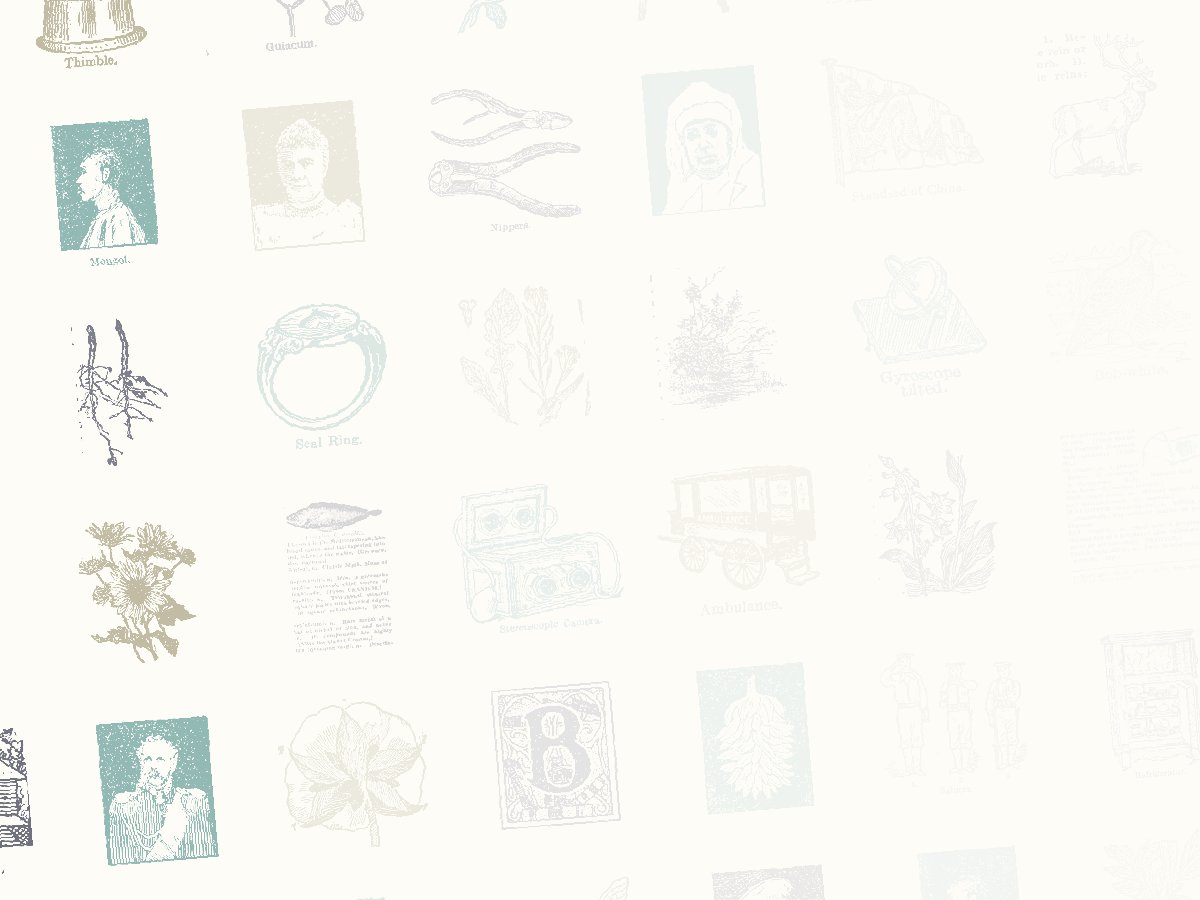

In [ ]:
def draw_slide(fullalpha=False):
    
    hsize = 900
    wsize = 1200
    wmargin = 100
    hmargin = 100
    page_color = (254, 252, 247)
    illustration_height = 150
    
    green = (121, 168, 164)
    grey = (96, 99, 114)
    toupe = (178, 173, 143)
    colors = [green, grey, toupe]

    im = Image.new('RGBA', (wsize, hsize), color=page_color)
    draw = ImageDraw.Draw(im)
    
    overlay = Image.new('RGBA', (wsize*2, hsize*2), color=(256, 256, 256, 0))
    
    opacity = 1
    
    i = 0
    j = 0
    for left_pos in range(0, wsize*2, 200):
        for top_pos in range(-100, hsize*2, 200):
            color = colors[(i+j)%3]

            ill_full = get_illustration()
            ill = ill_full.resize((int(illustration_height*(ill_full.size[0] / ill_full.size[1])),
                                  int(illustration_height)),
                                  Image.ANTIALIAS)
            illmask = create_img_mask(ill)
            
            lower_opacity_masks = ImageEnhance.Brightness(illmask).enhance(opacity)
            
            color_block = Image.new('RGB',ill.size,color)
            overlay.paste(color_block,
                     (int(left_pos+50-((ill.size[0]))/2), int(top_pos+50-((ill.size[1]))/2)),
                     lower_opacity_masks.rotate(0))
            j += 1
        if not fullalpha:
            if i < 2:
                opacity -= 0.05
            if i == 2:
                opacity -= 0.4
            elif i == 3:
                opacity -= 0.1
            elif i > 3:
                opacity -= 0.05
            i += 1
    
    #im.paste(overlay)
    rotated_overlay = overlay.rotate(5).crop((int(wsize/4), int(hsize/4), 5*int(wsize/4), 5*int(hsize/4)))
    return Image.alpha_composite(im, rotated_overlay)

im = draw_slide() #.resize((600, 450), Image.ANTIALIAS)
im

In [ ]:
for i in range(1, 21):
    fname_num = str(i).rjust(4, "0")
    im = draw_slide()
    im.save("../data/slides/slide-{}.png".format(fname_num))
    
for i in range(1, 21):
    fname_num = str(i).rjust(4, "0")
    im = draw_slide(fullalpha=True)
    im.save("../data/slides/slide-fullalpha-{}.png".format(fname_num))

(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
